In [1]:
import pandas as pd

file_path = "IR_Assignment_3_ReviewData.csv"
encoding = 'latin1' 
valid_chunks = []


try:
    with open(file_path, 'r', encoding=encoding) as file:
        
        chunksize = 10000 
        for chunk in pd.read_csv(file, encoding=encoding, chunksize=chunksize, on_bad_lines='skip'):
          
            valid_rows = []
            for idx, row in chunk.iterrows():
                try:
                    valid_rows.append(row)
                except pd.errors.ParserError:
                    # Skip rows with parsing errors
                    continue
            
            # Convert valid_rows list to DataFrame and append to valid_chunks
            if valid_rows:
                valid_df = pd.DataFrame(valid_rows)
                valid_chunks.append(valid_df)
                
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")


main_df = pd.concat(valid_chunks, ignore_index=True)

print(main_df.info())

# Find the top 50 rows and print each attribute in the next line for each column
top_50_rows = main_df.head(50)
for idx, row in top_50_rows.iterrows():
    print(f"Row {idx}:")
    for col_name, value in row.items():
        print(f"{col_name}: {value}")
    print("") 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13090043 entries, 0 to 13090042
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         object
 1   vote            object
 2   verified        object
 3   reviewTime      object
 4   reviewerID      object
 5   asin            object
 6   style           object
 7   reviewerName    object
 8   reviewText      object
 9   summary         object
 10  unixReviewTime  object
 11  image           object
dtypes: object(12)
memory usage: 1.2+ GB
None
Row 0:
overall: 5.0
vote: 67
verified: True
reviewTime: 09 18, 1999
reviewerID: AAP7PPBU72QFM
asin: 0151004714
style: {'Format:': ' Hardcover'}
reviewerName: D. C. Carrad
reviewText: This is the best novel I have read in 2 or 3 years.  It is everything that fiction should be -- beautifully written, engaging, well-plotted and structured.  It has several layers of meanings -- historical, family,  philosophical and more -- and blends them all ski

In [2]:
#Creating a sample csv file
main_df_subset = main_df.head(10000)
output_csv_filename = "sample_data_main_df_10000_rows_wo_preprocessing.csv"
main_df_subset.to_csv(output_csv_filename, index=False)

In [3]:
num_rows =main_df.shape[0]
print("Number of rows in the Main DataFrame:", num_rows)

Number of rows in the Main DataFrame: 13090043


In [1]:
import pandas as pd
json_file_path = 'meta_Electronics.json'
data = []

chunk_size = 1000 

# Open the JSON file and read it in chunks
with open(json_file_path, 'r') as file:
    for chunk in pd.read_json(file, lines=True, chunksize=chunk_size):
        data.append(chunk)

meta_data_df = pd.concat(data, ignore_index=True)
print(meta_data_df.info())
print("Shape of metadata DataFrame:", meta_data_df.shape)

print(meta_data_df.head())  

#Top 50 rows
top_50_rows_meta_data = meta_data_df.head(50)
for idx, row in top_50_rows_meta_data.iterrows():
    print(f"Row {idx}:")
    for col_name, value in row.items():
        print(f"{col_name}: {value}")
    print("")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786445 entries, 0 to 786444
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   category         786445 non-null  object
 1   tech1            786445 non-null  object
 2   description      786445 non-null  object
 3   fit              786445 non-null  object
 4   title            786445 non-null  object
 5   also_buy         786445 non-null  object
 6   tech2            786445 non-null  object
 7   brand            786445 non-null  object
 8   feature          786445 non-null  object
 9   rank             786445 non-null  object
 10  also_view        786445 non-null  object
 11  main_cat         786445 non-null  object
 12  similar_item     786445 non-null  object
 13  date             785741 non-null  object
 14  price            786445 non-null  object
 15  asin             786445 non-null  object
 16  imageURL         786445 non-null  object
 17  imageURLHi

In [ ]:
#Creating a sample csv file
meta_data_df_subset = meta_data_df.head(10000)
output_csv_filename = "sample_data_meta_data_df_10000_rows_wo_preprocessing.csv"
meta_data_df_subset.to_csv(output_csv_filename, index=False)

In [12]:
num_rows = meta_data_df.shape[0]
print("Number of rows in the Metadata DataFrame:", num_rows)

Number of rows in the Metadata DataFrame: 786445


In [2]:
#Choosen Product
# Define keywords related to headphones
headphone_keywords = ['headphone', 'headphones','headphones(in-ear)','noise-canceling headphones']
#Provided I have clearly distinguished it from headsets and headphones

In [3]:
# Function to check if any column contains headphone-related keywords
def contains_headphones(row):
    try:
    # Check title column
        if pd.notna(row['title']) and any(keyword in str(row['title']).lower() for keyword in headphone_keywords):
            return True
        # Check description and category column
        elif pd.notna(row['category']) and any(keyword in str(row['category']).lower() for keyword in headphone_keywords) and pd.notna(row['description']) and any(keyword in str(row['description']).lower() for keyword in headphone_keywords):
            return True
        else:
            return False
    except:
        return False

# Function to check if any column contains headphone-related keywords
def contains_headphones_only_title(row):
    try:
    # Check title column
        if pd.notna(row['title']) and any(keyword in str(row['title']).lower() for keyword in headphone_keywords):
            return True
        # Check description and category column
        # elif pd.notna(row['category']) and any(keyword in str(row['category']).lower() for keyword in headphone_keywords) and pd.notna(row['description']) and any(keyword in str(row['description']).lower() for keyword in headphone_keywords):
        #     return True
        else:
            return False
    except:
        return False

filtered_metadata = meta_data_df[meta_data_df.apply(contains_headphones, axis=1)]
headphones_asin_set = set(filtered_metadata['asin'])
print("Total ASIN numbers for headphones:")
print(len(headphones_asin_set))

import pickle
with open("asin_one_product.pkl", 'wb') as f:
    pickle.dump(headphones_asin_set, f)

filtered_metadata = meta_data_df[meta_data_df.apply(contains_headphones_only_title, axis=1)]
filtered_metadata.to_csv("Filtered_Metadata_df_headphones.csv")
headphones_asin_set = set(filtered_metadata['asin'])


with open("asin_one_product_only_title_based.pkl", 'wb') as f:
    pickle.dump(headphones_asin_set, f)

print("Total ASIN numbers for headphones only title:")
print(len(headphones_asin_set)) 


Total ASIN numbers for headphones:
26865
Total ASIN numbers for headphones only title:
26865


In [5]:
import pickle
with open("asin_one_product_only_title_based.pkl", 'rb') as f:
    headphones_asin_set = pickle.load(f)

In [24]:
headphones_asin_list = list(headphones_asin_set)

#Observing values
print("Any 5 values from the set:")
for i in range(min(10, len(headphones_asin_list))):
    print(headphones_asin_list[i])

Any 5 values from the set:
B017R5SDZY
B013SA8X8Y
B00HS7J9JQ
B011QJEU0Y
B00N1U2UQI
B00515JDW0
B007YYBTBY
B00AK28NNO
B00P3T6XI6
B0142Q7P6O


In [26]:
# Filter main dataframe for rows with ASIN numbers corresponding to headphones
filtered_main_df = main_df[main_df['asin'].isin(headphones_asin_set)]
df=filtered_main_df

num_rows = df.shape[0]
print("Number of rows in the Product based main DataFrame:", num_rows)

print(df.info())
print(df.head())

Number of rows in the Product based main DataFrame: 26496
<class 'pandas.core.frame.DataFrame'>
Index: 26496 entries, 11480 to 3829070
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         26181 non-null  object
 1   vote            5277 non-null   object
 2   verified        26496 non-null  object
 3   reviewTime      26496 non-null  object
 4   reviewerID      26496 non-null  object
 5   asin            26496 non-null  object
 6   style           22879 non-null  object
 7   reviewerName    26491 non-null  object
 8   reviewText      26494 non-null  object
 9   summary         26493 non-null  object
 10  unixReviewTime  16619 non-null  object
 11  image           4223 non-null   object
dtypes: object(12)
memory usage: 2.6+ MB
None
      overall vote verified   reviewTime      reviewerID        asin  \
11480     5.0  NaN     True  03 17, 2006  A2K4M352NBETYU  B00001OPK7   
11481     2.0  NaN     Tru

In [27]:
df.to_csv("raw_file.csv",index=False)

In [29]:
num_rows =df.shape[0]
print("Product Keywords:",headphone_keywords)
print("Number of rows in the Main DataFrame related to product:", num_rows)

#In order to save computation space 
columns_to_keep = ['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'reviewText', 'summary']

df_filtered = df[columns_to_keep]

missing_values = df.isnull().sum()
print("Missing values per column in main df:")
print(missing_values)

missing_values = df_filtered.isnull().sum()
print("Missing values per column in df filtered:")
print(missing_values)


df_cleaned=df_filtered['verified'].fillna("False")
df_filtered['verified']=df_cleaned


df_cleaned=df_filtered.dropna()
df_filtered=df_cleaned.drop_duplicates()

num_rows = df_filtered.shape[0]


Product Keywords: ['headphone', 'headphones', 'headphones(in-ear)', 'noise-canceling headphones']
Number of rows in the Main DataFrame related to product: 26496
Missing values per column in main df:
overall             315
vote              21219
verified              0
reviewTime            0
reviewerID            0
asin                  0
style              3617
reviewerName          5
reviewText            2
summary               3
unixReviewTime     9877
image             22273
dtype: int64
Missing values per column in df filtered:
overall       315
verified        0
reviewTime      0
reviewerID      0
asin            0
reviewText      2
summary         3
dtype: int64


C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\418087693.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['verified']=df_cleaned


In [30]:
print("Number of rows in the DataFrame after droping missing value rows and duplicate rows:", num_rows)
print(df_filtered.info())

Number of rows in the DataFrame after droping missing value rows and duplicate rows: 26060
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     26060 non-null  object
 1   verified    26060 non-null  object
 2   reviewTime  26060 non-null  object
 3   reviewerID  26060 non-null  object
 4   asin        26060 non-null  object
 5   reviewText  26060 non-null  object
 6   summary     26060 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB
None


In [31]:
df=df_filtered

def parse_review_time(time_str):
    try:
        tokens = time_str.split(' ')
        if len(tokens) != 3:
            return pd.NaT  # Return NaT (Not a Time) for invalid dates

        month, date, year = tokens
        date_str = f"{month} {date}, {year}"

        return pd.to_datetime(date_str)
    except:
        return pd.NaT  
print("No changes")
print(df.info())
# Convert columns to desired data types
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')  # Convert 'overall' to float
print("overall to float")
print(df.info())
df['verified'] = df['verified'].str.lower().map({'true': True, 'false': False})  # Convert 'verified' to boolean
print("verified to boolean")
print(df.info())
df['reviewerID'] = df['reviewerID'].astype(str)  # Convert 'reviewerID' to string
print("reviewID to string")
print(df.info())
df['asin'] = df['asin'].astype(str)  # Convert 'asin' to numeric
print("asin to string")
print(df.info())
df['reviewText'] = df['reviewText'].astype(str)  # Convert 'reviewText' to string
print("reviewText to string")
print(df.info())
df['summary'] = df['summary'].astype(str)  # Convert 'summary' to string
print("summary to string")
print(df.info())
df['reviewTime'] = df['reviewTime'].apply(parse_review_time)  # Convert 'reviewTime'
print("reviewtime to pd.time")
print(df.info())

print(df.info())
# Filter out rows with NaN values in any column
df = df.dropna()

No changes
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     26060 non-null  object
 1   verified    26060 non-null  object
 2   reviewTime  26060 non-null  object
 3   reviewerID  26060 non-null  object
 4   asin        26060 non-null  object
 5   reviewText  26060 non-null  object
 6   summary     26060 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB
None
overall to float
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     26057 non-null  float64
 1   verified    26060 non-null  object 
 2   reviewTime  26060 non-null  object 
 3   reviewerID  26060 non-null  object 
 4   asin        26060 non-null  object 
 5   reviewText  26060 non-null  object 
 6   summary     2606

C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\3099504541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall'] = pd.to_numeric(df['overall'], errors='coerce')  # Convert 'overall' to float
C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\3099504541.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['verified'] = df['verified'].str.lower().map({'true': True, 'false': False})  # Convert 'verified' to boolean
C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\3099504541.py:26: SettingWith

<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     26057 non-null  float64
 1   verified    26060 non-null  bool   
 2   reviewTime  26060 non-null  object 
 3   reviewerID  26060 non-null  object 
 4   asin        26060 non-null  object 
 5   reviewText  26060 non-null  object 
 6   summary     26060 non-null  object 
dtypes: bool(1), float64(1), object(5)
memory usage: 1.4+ MB
None
summary to string
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     26057 non-null  float64
 1   verified    26060 non-null  bool   
 2   reviewTime  26060 non-null  object 
 3   reviewerID  26060 non-null  object 
 4   asin        26060 non-null  object 
 5   reviewText  26060 non-null  object 
 

C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\3099504541.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['summary'] = df['summary'].astype(str)  # Convert 'summary' to string


reviewtime to pd.time
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     26057 non-null  float64       
 1   verified    26060 non-null  bool          
 2   reviewTime  26060 non-null  datetime64[ns]
 3   reviewerID  26060 non-null  object        
 4   asin        26060 non-null  object        
 5   reviewText  26060 non-null  object        
 6   summary     26060 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(4)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 26060 entries, 11480 to 3829070
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   overall     26057 non-null  float64       
 1   verified    26060 non-null  bool          
 2   reviewTime  26060 non-null  datetime64[ns]
 3 

C:\Users\ttony\AppData\Local\Temp\ipykernel_24820\3099504541.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviewTime'] = df['reviewTime'].apply(parse_review_time)  # Convert 'reviewTime'


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26057 entries, 0 to 26056
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     26057 non-null  float64
 1   verified    26057 non-null  bool   
 2   reviewTime  26057 non-null  object 
 3   reviewerID  26057 non-null  object 
 4   asin        26057 non-null  object 
 5   reviewText  26057 non-null  object 
 6   summary     26057 non-null  object 
dtypes: bool(1), float64(1), object(5)
memory usage: 1.2+ MB
None


In [122]:
# Filter rows where 'verified' is True
df_verified = df[df['verified'] == True]

print(df_verified.info())
df_verified.to_csv('verified_reviews.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 21862 entries, 0 to 26048
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   overall               21862 non-null  float64       
 1   verified              21862 non-null  bool          
 2   reviewTime            21862 non-null  datetime64[ns]
 3   reviewerID            21862 non-null  object        
 4   asin                  21862 non-null  object        
 5   reviewText            21862 non-null  object        
 6   summary               21862 non-null  object        
 7   processed_reviewText  21862 non-null  object        
 8   year                  21862 non-null  int32         
 9   proccessed_summary    21862 non-null  object        
 10  rating_class          21862 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), object(7)
memory usage: 1.8+ MB
None


In [36]:
df.to_csv("final_file.csv", index=False)

In [12]:
import pandas as pd

raw_df=pd.read_csv("raw_file.csv")

num_rows = raw_df.shape[0]
print(f"Number of rows for the product before preprocessing: {num_rows}")

df=pd.read_csv("verified_reviews.csv")
num_rows = df.shape[0]


print(f"Number of rows for the product after preprocessing and dtype conversions: {num_rows}")

Number of rows for the product before preprocessing: 26496
Number of rows for the product after preprocessing and dtype conversions: 21862


In [13]:
#Descriptive Statistics
number_of_reviews = df.shape[0]

# Calculate Average Rating Score
average_rating_score = df['overall'].mean()

# Calculate Number of Unique Products
number_of_unique_products = df['asin'].nunique()

# Calculate Number of Good Ratings (Rating >= 3 is considered 'good')
number_of_good_ratings = df[df['overall'] >= 3].shape[0]

# Calculate Number of Bad Ratings (Rating < 3 is considered 'bad')
number_of_bad_ratings = df[df['overall'] < 3].shape[0]

# Calculate Number of Reviews corresponding to each Rating
rating_counts = df['overall'].value_counts().sort_index()

# Print the Descriptive Statistics
print("Descriptive Statistics of the Product:")
print("--------------------------------------")
print(f"a. Number of Reviews: {number_of_reviews}")
print(f"b. Average Rating Score: {average_rating_score:.2f}")
print(f"c. Number of Unique Products: {number_of_unique_products}")
print(f"d. Number of Good Ratings: {number_of_good_ratings}")
print(f"e. Number of Bad Ratings: {number_of_bad_ratings}")
print("f. Number of Reviews corresponding to each Rating:")
print(rating_counts)

Descriptive Statistics of the Product:
--------------------------------------
a. Number of Reviews: 21862
b. Average Rating Score: 4.16
c. Number of Unique Products: 533
d. Number of Good Ratings: 19152
e. Number of Bad Ratings: 2710
f. Number of Reviews corresponding to each Rating:
overall
1.0     1365
2.0     1345
3.0     2223
4.0     4512
5.0    12417
Name: count, dtype: int64


In [14]:
#Preprocessing the text

import pandas as pd
import re
import unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Predefined dictionary for expanding acronyms - tried apis
acronym_dict = {
    "isn't": "is not",
    "can't": "cannot",
    "won't": "will not",
    "shouldn't": "should not",
     "lol": "laugh out loud",
    "brb": "be right back",
    "btw": "by the way",
    "omg": "oh my god",
    "imo": "in my opinion",
    "idk": "I don't know",
    "tbh": "to be honest",
    "rofl": "rolling on the floor laughing",
    "gtg": "got to go",
    "smh": "shaking my head",
    "np": "no problem",
    "fyi": "for your information",
    "iirc": "if I recall correctly",
    "afaik": "as far as I know","faq": "frequently asked questions",
    "qc": "quality control",
    "oem": "original equipment manufacturer",
    "odm": "original design manufacturer",
    "sku": "stock keeping unit",
    "eol": "end of life",
    "nib": "new in box",
    "bnib": "brand new in box",
    "nwot": "new without tags",
    "nwt": "new with tags",
    "obo": "or best offer",
    "bnwt": "brand new with tags",
    "bnip": "brand new in package",
    "asap": "as soon as possible",
    "eta": "estimated time of arrival",
    "nos": "new old stock",
    "nip": "new in package",
    "dslr": "digital single lens reflex",
    "led": "light emitting diode",
    "lcd": "liquid crystal display",
    "oled": "organic light emitting diode",
    "hdr": "high dynamic range",
    "ips": "in-plane switching",
    "va": "vertical alignment",
    "tn": "twisted nematic",
    "g-sync": "nvidia's adaptive sync technology",
    "freesync": "amd's adaptive sync technology",
    "hdr10": "high dynamic range (10-bit)",
    "hdmi": "high-definition multimedia interface",
    "usb-c": "universal serial bus type-c",
    "ssd": "solid state drive",
    "hdd": "hard disk drive",
    "nvme": "non-volatile memory express",
    "ram": "random access memory",
    "cpu": "central processing unit",
    "gpu": "graphics processing unit",
    "vram": "video random access memory",
    "mbps": "megabits per second",
    "gbps": "gigabits per second",
    "ghz": "gigahertz",
    "mhz": "megahertz",
    "rgb": "red green blue",
    "cmyk": "cyan magenta yellow black",
    "ppi": "pixels per inch",
    "dpi": "dots per inch",
    "arc": "audio return channel",
    "psu": "power supply unit",
    "ups": "uninterruptible power supply",
    "vga": "video graphics array",
    "dvi": "digital visual interface",
    "osd": "on-screen display",
    "dpi": "dots per inch",
    "hifi": "high fidelity",
    "thx": "george lucas' audio certification program",
    "dsp": "digital signal processing",
    "nfc": "near field communication",
    "rf": "radio frequency",
    "ir": "infrared",
    "usb": "universal serial bus",
    "mp3": "mpeg audio layer-3",
    "flac": "free lossless audio codec",
    "aac": "advanced audio coding",
    "aptx": "audio codec for bluetooth",
    "dts": "digital theater systems",
    "bt": "bluetooth",
    "nfc": "near field communication",
    "ai": "artificial intelligence",
    "iot": "internet of things",
    "ar": "augmented reality",
    "vr": "virtual reality",
    "ml": "machine learning",
    "dl": "deep learning",
    "cnn": "convolutional neural network",
    "rnn": "recurrent neural network",
    "nlp": "natural language processing",
    "lstm": "long short-term memory",
    "aws": "amazon web services",
    "gcp": "google cloud platform",
    "azure": "microsoft azure",
    "saas": "software as a service",
    "paas": "platform as a service",
    "iaas": "infrastructure as a service",
    "devops": "development and operations",
    "ci/cd": "continuous integration/continuous deployment",
    "agile": "adaptive, iterative, and incremental",
    "scrum": "a framework for agile development",
    "kubernetes": "container orchestration platform",
    "docker": "containerization platform",
    "git": "version control system",
    "github": "online git repository hosting service",
    "bitbucket": "git repository management tool",
    "jira": "project management tool",
    "slack": "team collaboration tool",
    "crm": "customer relationship management",
    "erp": "enterprise resource planning",
    "pos": "point of sale",
    "seo": "search engine optimization",
    "sem": "search engine marketing",
    "ppc": "pay per click",
    "cta": "call to action",
    "ctr": "click-through rate",
    "cpa": "cost per acquisition",
    "cpc": "cost per click",
    "cpl": "cost per lead",
    "roi": "return on investment",
    "ux": "user experience"
}

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove accented characters
def remove_accented_chars(text):
    normalized_text = unicodedata.normalize('NFKD', text)
    return normalized_text.encode('ascii', 'ignore').decode('utf-8', 'ignore')

# Function to expand acronyms using predefined dictionary
def expand_acronyms(text):
    for acronym, expanded in acronym_dict.items():
        text = text.replace(acronym, expanded)
    return text

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Function for lemmatization
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

# Function for text normalization (including stopwords removal)
def normalize_text(text):
    text = text.lower()  # Convert text to lowercase
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = expand_acronyms(text)
    text = remove_special_characters(text)
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize tokens
    normalized_text = lemmatize_text(' '.join(filtered_tokens))
    return normalized_text

# Preprocess the 'reviewText' column
df['processed_reviewText'] = df['reviewText'].apply(normalize_text)

print(df[['reviewText', 'processed_reviewText']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ttony\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ttony\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ttony\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\ttony\AppData\Local\Temp\ipykernel_28476\3268048107.py:149: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                                          reviewText  \
0  I am really satisfied with this purchase. The ...   
1  This item gets two stars instead of one becaus...   
2  Sound Quality very good, easy setup and like t...   
3  I bought these headphones because I saw other ...   
4                              very good for sports.   

                                processed_reviewText  
0  really satisfied purchase headphone augmented ...  
1  item get two staugmented reality instead one f...  
2  sound quality good easy setup like paging func...  
3  bought headphone saw reviewer say sounded good...  
4                                         good sport  


In [58]:
meta_data_df=pd.read_csv("Filtered_Metadata_df_headphones.csv")
print(meta_data_df.info())
print(meta_data_df.head())

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27412 entries, 0 to 27411
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       27412 non-null  int64 
 1   category         27412 non-null  object
 2   tech1            1208 non-null   object
 3   description      27412 non-null  object
 4   fit              2 non-null      object
 5   title            27412 non-null  object
 6   also_buy         27412 non-null  object
 7   tech2            47 non-null     object
 8   brand            27277 non-null  object
 9   feature          27412 non-null  object
 10  rank             27412 non-null  object
 11  also_view        27412 non-null  object
 12  main_cat         27366 non-null  object
 13  similar_item     9073 non-null   object
 14  date             18473 non-null  object
 15  price            9021 non-null   object
 16  asin             27412 non-null  object
 17  imageURL         27412 non-null

In [16]:
# Merge main_df with metadata_electronics_df on 'asin' to get brand information
merged_df = pd.merge(df, meta_data_df[['asin', 'brand']], on='asin', how='left')
print(df.shape)
print(merged_df.shape)
merged_df=merged_df.drop_duplicates()
print(merged_df.shape)

# Calculate the number of reviews per brand
brand_review_counts = merged_df['brand'].value_counts()

# Get top 20 most reviewed brands
top_20_most_reviewed_brands = brand_review_counts.head(20)
print("Top 20 most reviewed brands:")
print(top_20_most_reviewed_brands)


(21862, 11)
(26020, 12)
(21862, 12)
Top 20 most reviewed brands:
brand
Sony              2818
Sennheiser        2430
JVC               1827
Audio-Technica    1050
Koss               976
Panasonic          658
V-MODA             528
Roku               509
ZCMYFA             420
ABCShopUSA         414
Philips            411
IMBCYL             376
Beats              348
Behringer          337
MEE audio          298
Asus               288
JLAB               277
Belkin             250
Etre Jeune         248
EldHus             242
Name: count, dtype: int64


In [17]:
# Get top 20 least reviewed brands
top_20_least_reviewed_brands = brand_review_counts.tail(20).sort_values()
print("Top 20 least reviewed brands:")
print(top_20_least_reviewed_brands)

Top 20 least reviewed brands:
brand
TVTimedirect    1
LSTN Sound      1
Cyber-Blue      1
JAYS            1
ChicBuds        1
LENTION         1
Ulko            1
Chenzala        1
Hello Kitty     1
CARDAS AUDIO    1
iFrogz          2
Auvio           2
Aiwa            2
Logitech        2
ART             2
GE              2
Recoton         2
*               2
Connectland     2
Wicked          2
Name: count, dtype: int64


In [18]:
#gnerating the mean user ratings
product_mean_ratings = df.groupby('asin')['overall'].mean()
mean_ratings_df = pd.DataFrame(product_mean_ratings)
# Reset the index to make 'asin' a regular column instead of the index
mean_ratings_df.reset_index(inplace=True)
# Rename the column to 'mean_rating'
mean_ratings_df.rename(columns={'overall': 'mean_rating'}, inplace=True)
# Print the shape of the new DataFrame
most_positively_reviewed_asin = mean_ratings_df.sort_values(by='mean_rating', ascending=False).iloc[0]['asin']

# Retrieve product details (metadata) for the most positively reviewed 'asin' from metadata_electronics_df
product_details = meta_data_df[meta_data_df['asin'] == most_positively_reviewed_asin]

# Display the product details
print("Most Positively Reviewed Product Details:")
print("\nProduct Title:", product_details['title'].values[0])
print("Product Brand:", product_details['brand'].values[0])
print("Product description:", product_details['description'].values[0])
print("Product Category:", product_details['category'].values[0])
print("Tech Features:", product_details['feature'].values[0])

Most Positively Reviewed Product Details:

Product Title: House of Marley EM-FE003-MI Redemption Song Midnight In-Ear Headphones with Apple Three-Button Controller
Product Brand: House of Marley
Product description: ['The Redemption Song in-ear premium headphone collection is made with eco-responsible materials and precision acoustic components to deliver a high quality look, feel and listening experience.']
Product Category: ['Electronics', 'Headphones', 'Earbud Headphones']
Tech Features: ['FSC wood rear housing, aluminum front housing, and stainless steel rear grill', 'Durable braided cable with recycled plastic strain relief', 'Storage case', 'Small, medium and large ear tips', 'Microphone with Apple three-button controller. Connectivity Technology: Wired']


In [19]:
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

df['year'] = df['reviewTime'].dt.year
ratings_by_year = df.groupby('year').size()

consecutive_years = ratings_by_year.index.sort_values(ascending=False)[:5]
print("Count of ratings for the entire dataset over the last 5 consecutive years:")
for year in consecutive_years:
    print(f"Year {year}: {ratings_by_year[year]} ratings")

Count of ratings for the entire dataset over the last 5 consecutive years:
Year 2018: 508 ratings
Year 2017: 1580 ratings
Year 2016: 2823 ratings
Year 2015: 4276 ratings
Year 2014: 4160 ratings


In [20]:
! pip install wordcloud nltk


C:\Users\ttony\AppData\Local\Temp\ipykernel_28476\3268048107.py:149: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


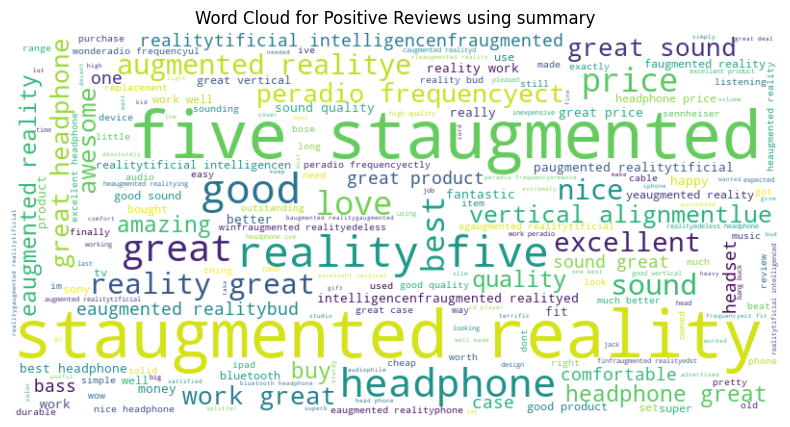

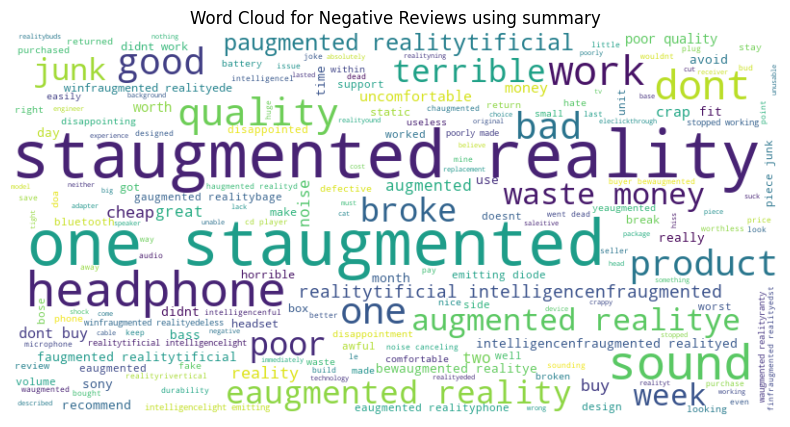

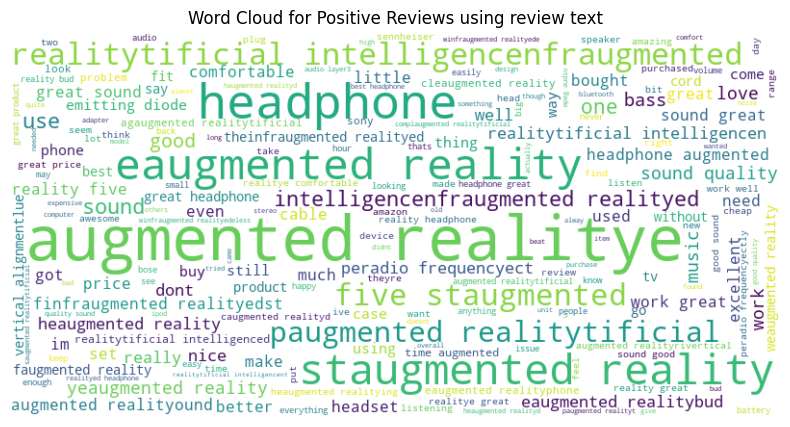

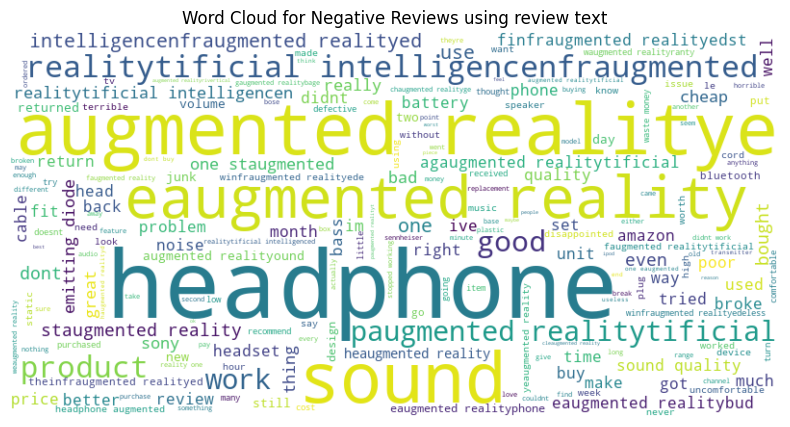

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['proccessed_summary'] = df['summary'].apply(normalize_text)
# Create separate DataFrame for positive and negative reviews based on 'overall' ratings
positive_reviews = df[df['overall'] >= 5]
negative_reviews = df[df['overall'] <= 1]

# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

positive_text = " ".join(positive_reviews['proccessed_summary'])
generate_word_cloud(positive_text, "Word Cloud for Positive Reviews using summary")

negative_text = " ".join(negative_reviews['proccessed_summary'])
generate_word_cloud(negative_text, "Word Cloud for Negative Reviews using summary")

positive_review_text = " ".join(positive_reviews['processed_reviewText'])
generate_word_cloud(positive_review_text, "Word Cloud for Positive Reviews using review text")

negative_review_text = " ".join(negative_reviews['processed_reviewText'])
generate_word_cloud(negative_review_text, "Word Cloud for Negative Reviews using review text")


#I decided to use the preprocessed summary text for this purpose


Most Common Words in Positive Reviews:
1. reality
2. great
3. staugmented
4. five
5. headphone
6. sound
7. good
8. price
9. best
10. work

Most Common Words in Negative Reviews:
1. reality
2. one
3. staugmented
4. sound
5. headphone
6. dont
7. work
8. quality
9. eaugmented
10. buy

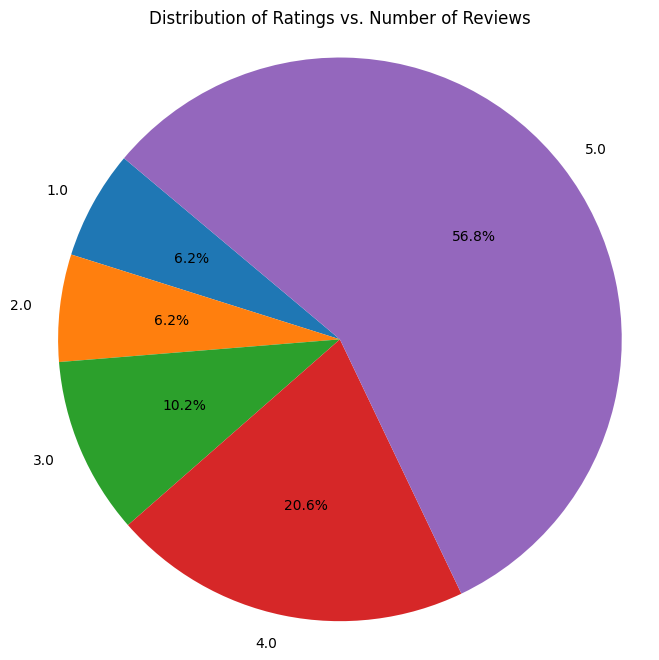

In [22]:

# Calculate count of reviews for each rating
rating_counts = df['overall'].value_counts().sort_index()
labels = rating_counts.index.astype(str)  # Convert ratings to string labels
sizes = rating_counts.values

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings vs. Number of Reviews')
plt.axis('equal') 
plt.show()

In [23]:
review_counts_by_year = df['year'].value_counts()

# Identify the year with maximum reviews
max_reviews_year = review_counts_by_year.idxmax()  # Get the index (year) with the maximum count
print(f"The year with the maximum reviews is: {max_reviews_year}")
print(f"Number of reviews in {max_reviews_year}: {review_counts_by_year[max_reviews_year]}")

The year with the maximum reviews is: 2015
Number of reviews in 2015: 4276


In [24]:
unique_customers_by_year = df.groupby('year')['reviewerID'].nunique()

# Identify the year with maximum unique customers
max_customers_year = unique_customers_by_year.idxmax()  # Get the index (year) with the maximum count
print(f"The year with the highest number of unique customers is: {max_customers_year}")
print(f"Number of unique customers in {max_customers_year}: {unique_customers_by_year[max_customers_year]}")

The year with the highest number of unique customers is: 2015
Number of unique customers in 2015: 4158


In [25]:
def categorize_rating(rating):
    if rating > 3:
        return 'Good'
    elif rating == 3:
        return 'Average'
    else:
        return 'Bad'

df['rating_class'] = df['overall'].apply(categorize_rating)
X = df['processed_reviewText']
y = df['rating_class']

In [26]:
df.to_csv("final_file2.csv")

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Split data into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.25, random_state=42)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# Define classifiers to compare
classifiers = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
target_metrics = ['precision', 'recall', 'f1-score', 'support']
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f"Classifier: {name}")
    print(pd.DataFrame(report).loc[target_metrics, ['Good', 'Average', 'Bad']].transpose())
    print("-----------------------------")

Classifier: SVM
         precision    recall  f1-score  support
Good      0.828366  0.988541  0.901393   4189.0
Average   0.632353  0.154122  0.247839    558.0
Bad       0.815710  0.375522  0.514286    719.0
-----------------------------
Classifier: Random Forest
         precision    recall  f1-score  support
Good      0.829224  0.979470  0.898107   4189.0
Average   0.537037  0.155914  0.241667    558.0
Bad       0.752809  0.372740  0.498605    719.0
-----------------------------
Classifier: Logistic Regression
         precision    recall  f1-score  support
Good      0.839862  0.987825  0.907854   4189.0
Average   0.671756  0.157706  0.255443    558.0
Bad       0.767157  0.435327  0.555457    719.0
-----------------------------
Classifier: Naive Bayes
         precision    recall  f1-score  support
Good      0.770462  1.000000  0.870351   4189.0
Average   0.750000  0.005376  0.010676    558.0
Bad       0.960000  0.033380  0.064516    719.0
-----------------------------
Classifier: K-

In [1]:
import pandas as pd

df=pd.read_csv("final_file2.csv")

#Creating user-item rating matrix
user_item_matrix = df.pivot_table(index='reviewerID', columns='asin', values='overall', fill_value=0)
print(user_item_matrix.shape)
# Normalize ratings using min-max scaling
user_item_matrix_scaled = (user_item_matrix - user_item_matrix.min()) / (user_item_matrix.max() - user_item_matrix.min())

(20759, 533)


In [2]:
import pickle
with open("user_item_matrix.pkl", "wb") as file:
    pickle.dump(user_item_matrix, file)

In [47]:
user_item_matrix.to_csv('user_item_matrix.csv', index=False, header=True) 


In [1]:
# # Retrieve the DataFrame using pickle
# import pickle
# with open('user_item_matrix.pkl', 'rb') as f:
#     user_item_matrix = pickle.load(f)
# user_item_matrix_scaled = (user_item_matrix - user_item_matrix.min()) / (user_item_matrix.max() - user_item_matrix.min())

In [3]:
print(user_item_matrix_scaled.shape)
print(type(user_item_matrix_scaled))
#print(user_item_matrix_scaled[0][0])
user_item_matrix_scaled.fillna(0, inplace=True)  # Fill missing values with zeros
user_item_matrix_np = user_item_matrix_scaled.values
print(type(user_item_matrix_np))
print(user_item_matrix_np.shape)

(20759, 533)
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(20759, 533)


In [55]:
print(user_item_matrix_np[0])

[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.4 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 

In [4]:
import numpy as np

def cosine_similarity(vector1, vector2):
    # Normalize vectors
    norm_vector1 = np.linalg.norm(vector1)
    norm_vector2 = np.linalg.norm(vector2)
    if norm_vector1 == 0 or norm_vector2 == 0:
        return 0  # Handle zero division gracefully
    normalized_vector1 = vector1 / norm_vector1
    normalized_vector2 = vector2 / norm_vector2

    # Compute dot product
    dot_product = np.dot(normalized_vector1, normalized_vector2)

    # Compute cosine similarity
    cosine_sim = dot_product

    return cosine_sim

In [6]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def cosine_similarity_custom(u, v):
    # Compute cosine similarity between vectors u and v
    dot_product = np.dot(u, v)
    norm_u = np.linalg.norm(u)
    norm_v = np.linalg.norm(v)
    
    if norm_u > 0 and norm_v > 0:
        similarity = dot_product / (norm_u * norm_v)
    else:
        similarity = 0.0  # Return 0 if vectors are zero-length
    
    return similarity

def user_user_collaborative_filtering(user_item_matrix, k_values, n_neighbors, k_folds=5):
    mae_scores = []

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(user_item_matrix):
        train_matrix = user_item_matrix[train_idx]
        val_matrix = user_item_matrix[val_idx]

        # Calculate user similarity matrix using custom cosine similarity
        user_similarity_matrix = np.zeros((len(train_idx), len(train_idx)))
        for i in range(len(train_idx)):
            for j in range(len(train_idx)):
                user_similarity_matrix[i, j] = cosine_similarity_custom(train_matrix[i], train_matrix[j])

        top_similar_users = np.argsort(user_similarity_matrix, axis=1)[:, -n_neighbors:]

        predicted_ratings = np.zeros_like(val_matrix, dtype=np.float64)
        for i in range(len(val_idx)):
            for j in range(val_matrix.shape[1]):  # Loop over all items
                if val_matrix[i][j] == 0:
                    similar_users = top_similar_users[i]
                    similar_ratings = train_matrix[similar_users, j]
                    similar_ratings = similar_ratings[~np.isnan(similar_ratings)]
                    if len(similar_ratings) > 0:
                        predicted_ratings[i][j] = np.mean(similar_ratings)

        # Flatten matrices for error calculation
        mask = ~np.isnan(val_matrix.flatten()) & ~np.isnan(predicted_ratings.flatten())
        mae = mean_absolute_error(val_matrix.flatten()[mask], predicted_ratings.flatten()[mask])
        mae_scores.append(mae)

    return mae_scores

k_values = [10, 20, 30, 40, 50]
n_neighbors = 10

# Perform user-user collaborative filtering
user_user_mae_scores = user_user_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for user-user collaborative filtering
plt.plot(k_values, user_user_mae_scores, label='User-User CF')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (User-User CF)')
plt.legend()
plt.show()

# Presenting the MAE scores in a tabular format
print("MAE Report for User-User Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{user_user_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
k_values = [10, 20, 30, 40, 50]
n_neighbors = 20

# Perform user-user collaborative filtering
user_user_mae_scores = user_user_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for user-user collaborative filtering
plt.plot(k_values, user_user_mae_scores, label='User-User CF')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (User-User CF)')
plt.legend()
plt.show()

# Presenting the MAE scores in a tabular format
print("MAE Report for User-User Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{user_user_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
k_values = [10, 20, 30, 40, 50]
n_neighbors = 30

# Perform user-user collaborative filtering
user_user_mae_scores = user_user_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for user-user collaborative filtering
plt.plot(k_values, user_user_mae_scores, label='User-User CF')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (User-User CF)')
plt.legend()
plt.show()

# Presenting the MAE scores in a tabular format
print("MAE Report for User-User Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{user_user_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
k_values = [10, 20, 30, 40, 50]
n_neighbors = 40

# Perform user-user collaborative filtering
user_user_mae_scores = user_user_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for user-user collaborative filtering
plt.plot(k_values, user_user_mae_scores, label='User-User CF')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (User-User CF)')
plt.legend()
plt.show()

# Presenting the MAE scores in a tabular format
print("MAE Report for User-User Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{user_user_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
k_values = [10, 20, 30, 40, 50]
n_neighbors = 50

# Perform user-user collaborative filtering
user_user_mae_scores = user_user_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for user-user collaborative filtering
plt.plot(k_values, user_user_mae_scores, label='User-User CF')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (User-User CF)')
plt.legend()
plt.show()

In [ ]:
# Presenting the MAE scores in a tabular format
print("MAE Report for User-User Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{user_user_mae_scores[i]}\t|")
print("---------------------------------------------------------")

MAE Report for User-User Collaborative Filtering (K values)
---------------------------------------------------------
|    K Value	|   Mean Absolute Error (MAE)   |
---------------------------------------------------------
|	10	|	0.0032095957131203137	|
|	20	|	0.0032164280179929412	|
|	30	|	0.003225171741490644	|
|	40	|	0.0032110469754097256	|
|	50	|	0.003239097581013429	|
---------------------------------------------------------


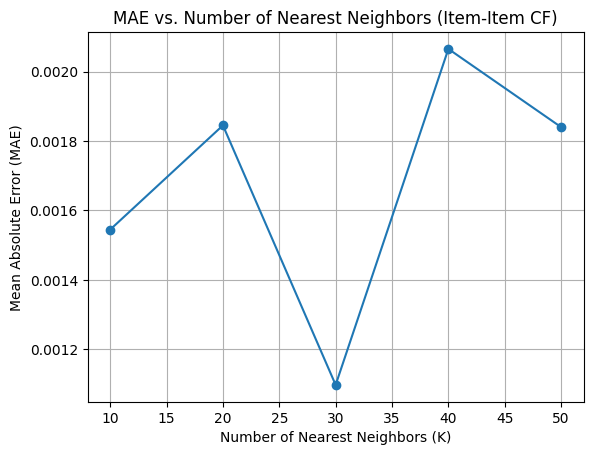

In [54]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
def item_item_collaborative_filtering(user_item_matrix, k_values, n_neighbors, k_folds=5):
    item_user_matrix = user_item_matrix.T
    mae_scores = []

    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    for train_idx, val_idx in kf.split(item_user_matrix):
        train_matrix = item_user_matrix[train_idx]
        val_matrix = item_user_matrix[val_idx]

        # Calculate item similarity matrix using custom cosine similarity
        item_similarity_matrix = np.zeros((train_matrix.shape[1], train_matrix.shape[1]))
        for i in range(train_matrix.shape[1]):
            for j in range(train_matrix.shape[1]):
                item_similarity_matrix[i, j] = cosine_similarity_custom(train_matrix[:, i], train_matrix[:, j])
        
        # Ensure that n_neighbors does not exceed the number of items
        n_neighbors = min(n_neighbors, item_similarity_matrix.shape[0]) 

        top_similar_items = np.argsort(item_similarity_matrix, axis=1)[:, -n_neighbors:]

        predicted_ratings = np.zeros_like(val_matrix, dtype=np.float64)
        for i in range(val_matrix.shape[0]):  # Loop over all users
            for j in range(val_matrix.shape[1]):  # Loop over all items
                if val_matrix[i][j] == 0:
                    # Ensure that similar items indices are within valid range
                    if j < top_similar_items.shape[0]:
                        similar_items = top_similar_items[j]
                        similar_items = similar_items[similar_items < train_matrix.shape[0]]  # Filter out out-of-bound indices
                        similar_ratings = train_matrix[similar_items, i]
                        similar_ratings = similar_ratings[~np.isnan(similar_ratings)]
                        if len(similar_ratings) > 0:
                            predicted_ratings[i][j] = np.mean(similar_ratings)

        # Flatten matrices for error calculation
        mask = ~np.isnan(val_matrix.flatten()) & ~np.isnan(predicted_ratings.flatten())
        mae = mean_absolute_error(val_matrix.flatten()[mask], predicted_ratings.flatten()[mask])
        mae_scores.append(mae)

    return mae_scores


k_values = [10, 20, 30, 40, 50]
n_neighbors = 10

# Perform item-item collaborative filtering
item_item_mae_scores = item_item_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for item-item collaborative filtering
plt.plot(k_values, item_item_mae_scores, marker='o')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (Item-Item CF)')
plt.grid(True)
plt.show()
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
n_neighbors = 20

# Perform item-item collaborative filtering
item_item_mae_scores = item_item_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for item-item collaborative filtering
plt.plot(k_values, item_item_mae_scores, marker='o')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (Item-Item CF)')
plt.grid(True)
plt.show()
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
n_neighbors = 30

# Perform item-item collaborative filtering
item_item_mae_scores = item_item_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for item-item collaborative filtering
plt.plot(k_values, item_item_mae_scores, marker='o')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (Item-Item CF)')
plt.grid(True)
plt.show()
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
n_neighbors = 40

# Perform item-item collaborative filtering
item_item_mae_scores = item_item_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for item-item collaborative filtering
plt.plot(k_values, item_item_mae_scores, marker='o')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (Item-Item CF)')
plt.grid(True)
plt.show()
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [ ]:
n_neighbors = 50

# Perform item-item collaborative filtering
item_item_mae_scores = item_item_collaborative_filtering(user_item_matrix_np, k_values, n_neighbors)

# Plot MAE vs. K for item-item collaborative filtering
plt.plot(k_values, item_item_mae_scores, marker='o')
plt.xlabel('Number of Nearest Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Nearest Neighbors (Item-Item CF)')
plt.grid(True)
plt.show()
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

In [56]:
# Presenting the MAE scores in a tabular format
print("MAE Report for Item-Item Collaborative Filtering (K values)")
print("---------------------------------------------------------")
print("|    K Value\t|   Mean Absolute Error (MAE)   |")
print("---------------------------------------------------------")
for i in range(len(k_values)):
    print(f"|\t{k_values[i]}\t|\t{item_item_mae_scores[i]}\t|")
print("---------------------------------------------------------")

MAE Report for Item-Item Collaborative Filtering (K values)
---------------------------------------------------------
|    K Value	|   Mean Absolute Error (MAE)   |
---------------------------------------------------------
|	10	|	0.0015449831540994342	|
|	20	|	0.0018451539766785087	|
|	30	|	0.0010976517485416003	|
|	40	|	0.002065317732916328	|
|	50	|	0.001840074063503865	|
---------------------------------------------------------


In [64]:
#User-User Recommendation System

userId=input("Enter a ReviewerID:\n")
if userId=="":
    userId="A19ZB5MMH1JLK3"
try:
    n=int(input("Enter the value of n for n users:\n"))
except:
    n=10

In [62]:
raw_df=pd.read_csv("raw_file.csv")

In [65]:
#User-User Recommender System
import pandas as pd

# Example: Filter raw_df to find review name for a given userID
def find_review_name(raw_df, userID):
    user_reviews = raw_df[raw_df['reviewerID'] == userID]
    if len(user_reviews) > 0:
        review_name = user_reviews.iloc[0]['reviewerName']  # Assuming 'reviewName' is the column name
        return review_name
    else:
        return None 

review_name = find_review_name(raw_df, userId)

if review_name:
    print(f"Review Name for UserID '{userId}': {review_name}")
else:
    print(f"No review found for UserID '{userId}'")


Review Name for UserID 'A19ZB5MMH1JLK3': Brittney Senerth


In [67]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Example: Compute top N similar users for a given userID with similarity scores and names
def find_top_similar_users_with_details(user_item_matrix, raw_df, userID, N):

    user_index = user_item_matrix.index.get_loc(userID)

    # Compute cosine similarity between the target user and all other users
    similarities = cosine_similarity(user_item_matrix.values[user_index, np.newaxis], user_item_matrix.values)

    # Sort similarities and get indices of top N similar users (excluding the user itself)
    similar_user_indices = np.argsort(similarities[0])[::-1][1:N+1]

    similar_user_scores = similarities[0, similar_user_indices]
    similar_user_ids = user_item_matrix.iloc[similar_user_indices].index.tolist()

    # Get the review names of the similar users
    similar_user_names = []
    for user_id in similar_user_ids:
        similar_user_names.append(find_review_name(raw_df,user_id))

    similar_users_df = pd.DataFrame({
        'Similarity Score': similar_user_scores,
        'UserID': similar_user_ids,
        'User Name': similar_user_names
    })

    return similar_users_df


similar_users_details = find_top_similar_users_with_details(user_item_matrix_scaled, raw_df, userId, n)
print(f"Top {n} Similar Users for UserID '{userId}':")
print(similar_users_details)


Top 100 Similar Users for UserID 'A19ZB5MMH1JLK3':
    Similarity Score          UserID                     User Name
0                1.0   APV4CA1BTAGQ3                            JT
1                1.0  A3VPVJMLX1X3L7                    piRskwayrd
2                1.0  A19ZB5MMH1JLK3              Brittney Senerth
3                1.0  A3H5U6295DEOWX                  Dane P. West
4                1.0  A384C7ACEROWNP                 Baboomaroonie
..               ...             ...                           ...
95               1.0  A24IS1LEMFQF8C                         mikey
96               1.0  A331HX0T4WZC29                           Lou
97               1.0  A2L7DFNK7YQFL7              Thanh Van Nguyen
98               1.0  A1FAN1LP2MFLRD                          Tony
99               1.0   ALUYNO0PD2ARM  Jack Ruby Built The Pyramids

[100 rows x 3 columns]


In [75]:
import pandas as pd

product_sum_ratings = user_item_matrix.sum(axis=0)

# Sort products by sum of ratings in descending order and get the top 10 products
top_10_products = product_sum_ratings.nlargest(10)

# Print the top 10 products by sum ratings
print("Top 10 Products by User Sum Ratings:")
print("-----------------------------------")
for rank, (asin_number, sum_rating) in enumerate(top_10_products.items(), 1):
    product_info = meta_data_df[meta_data_df['asin'] == asin_number].iloc[0]
    title = product_info['title']
    description = product_info['description'] 
    # Print product information
    print(f"{rank}. ASIN: {asin_number}, Sum Ratings: {sum_rating}")
    print(f"    Title: {title}")
    print(f"    Description: {description}")
    print()  

Top 10 Products by User Sum Ratings:
-----------------------------------
1. ASIN: B00F5NB7MW, Sum Ratings: 2218.0
    Title: Roku 2 Streaming Player with Headphone Jack
    Description: ['<div class="aplus"> <h4>Roku 2 Streaming Player 1080p HD plus enhanced remote                 with headphone jack</h4> <div class="leftImage" style="width: 549px;"><img src="https://images-na.ssl-images-amazon.com/images/G/01/electronics/Cat500/Roku/B00F5NB7MW-headline.png" /></div> <br /><br /> <br /><br />', 'Crank up the volume, and enjoy the show with the Roku                 2. Dive into 1,800+ channels of movies, TV shows, sports                 and more in stunning 1080p HD. Watch without disturbing                 the house when you plug the included headphones into the                 remote. Enjoy free features like channel shortcut                 buttons and much more.', '*Availability of 1080p HD video limited by channel                 provider and speed of broadband connection.<br /> **

Rough Work


In [76]:
#Item-Item Recommendation System

asin_number=input("Enter a ASIN:\n")
if asin_number=="":
    asin_number="B00001P505"
try:
    n=int(input("Enter the value of n for n items:\n"))
except:
    n=10

In [81]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def item_item_recommender(user_item_matrix, meta_data_df, itemID, N):
    # Check if the given itemID (ASIN) exists in the columns of user_item_matrix
    if itemID not in user_item_matrix.columns:
        print(f"Item '{itemID}' not found in user_item_matrix.")
        return None
    item_index = user_item_matrix.columns.get_loc(itemID)

    similarities = cosine_similarity(user_item_matrix.T.values[:, item_index].reshape(1, -1), user_item_matrix.T.values)

    similar_item_indices = np.argsort(similarities[0])[::-1][1:N+1]

    similar_item_asins = user_item_matrix.columns[similar_item_indices].tolist()
    similar_item_scores = similarities[0, similar_item_indices]

    # Get titles and descriptions of the similar items from meta_data_df
    similar_item_details = []
    for asin, score in zip(similar_item_asins, similar_item_scores):
        item_info = meta_data_df[meta_data_df['asin'] == asin].iloc[0]
        item_title = item_info['title']
        item_description = item_info['description']
        similar_item_details.append({
            'ASIN': asin,
            'Similarity Score': score,
            'Title': item_title,
            'Description': item_description
        })

    similar_items_df = pd.DataFrame(similar_item_details)

    return similar_items_df

# Call item_item_recommender function to get similar item details
similar_items_details = item_item_recommender(user_item_matrix_scaled.T, meta_data_df, asin_number, n)

if similar_items_details is not None:
    print(f"Top {n} Similar Items for Item '{asin_number}':")
    print(similar_items_details[['ASIN', 'Similarity Score', 'Title', 'Description']])




Item 'B00001P505' not found in user_item_matrix.
